In [51]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [52]:
# 타이타닉 데이터 다운로드
!kaggle competitions download -c titanic

test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


#Data Confirm

In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# How many servived?

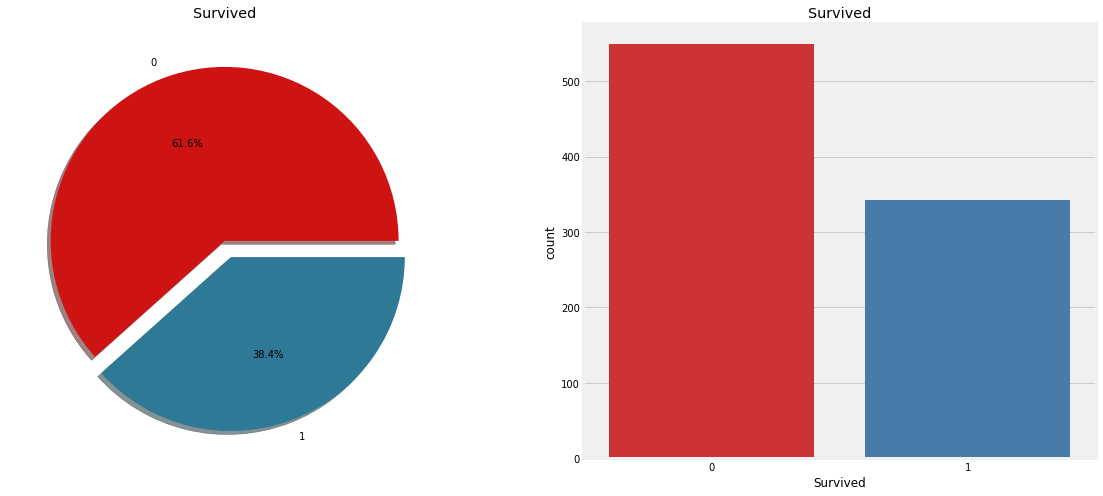

In [61]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
# Matplotlib 파이차트 그리기
# explode : 부채꼴이 파이 차트 중심에서 벗어나는 정도 설정(반지름의 n%만큼 벗어나도록 설정)
# autopct : 부채꼴 안에 표시될 숫자의 형식 지정. 소수점 한자리까지 표시하게 설정했다.

train_df['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=['#ce1313', '#2d7996'])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.set_palette("Set1", 2) # sns.countplot color edit
sns.countplot('Survived', data=train_df, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [62]:
# 성별과 생존여부를 묶어 count() 유용하다.
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

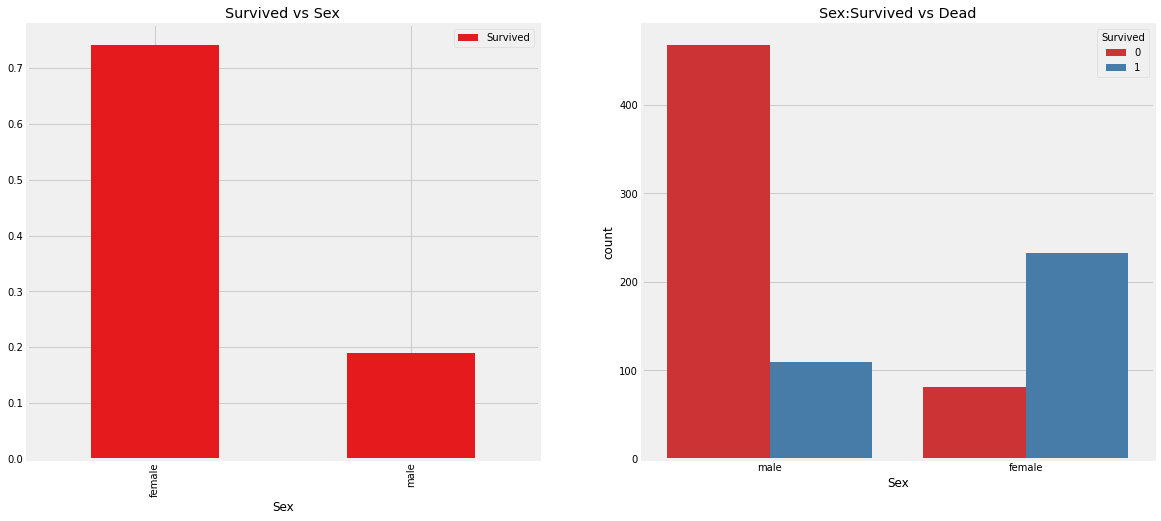

In [64]:
f, ax = plt.subplots(1,2,figsize=(18,8))
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#Pclass -> Ordinal Feature

In [65]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


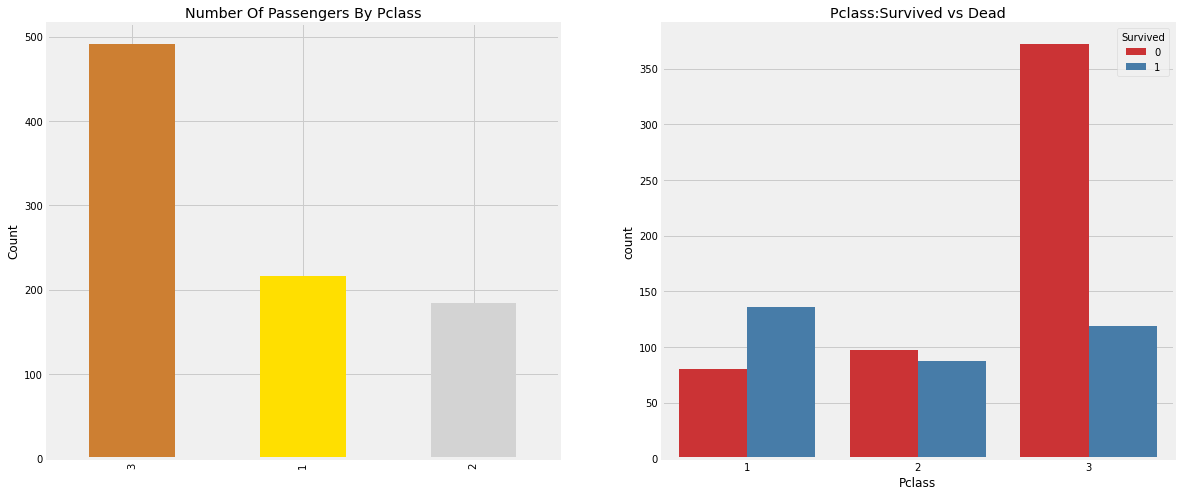

In [67]:
f, ax = plt.subplots(1,2,figsize=(18,8))
train_df['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [72]:
# crosstab
# 범주형 변수를 기준으로 개수 파악이나 수치형 데이터를 넣어 계산할 때 사용한다.
# crosstab 파라미터
# pd.crosstab(index=[], columns = ), index에는 y축에 넣을 값, columns에는 x축에 넣을 값을 넣어준다.
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True).style.background_gradient(cmap='summer_r')

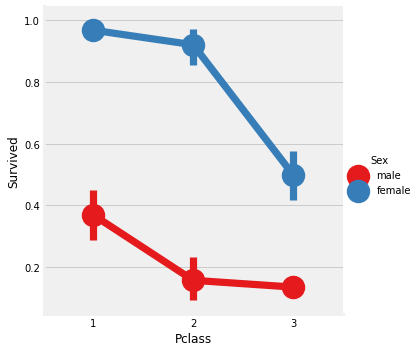

In [74]:
# factorplot
# 파라미터 (x, y, hue, col, kind, data),
sns.factorplot('Pclass','Survived',hue='Sex',data=train_df)
plt.show()

#Age -> Continuous Feature

In [76]:
print('Oldest Passenger was of:',train_df['Age'].max(),'Years')
print('Youngest Passenger was of:',train_df['Age'].min(),'Years')
print('Average Age on the ship:',train_df['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


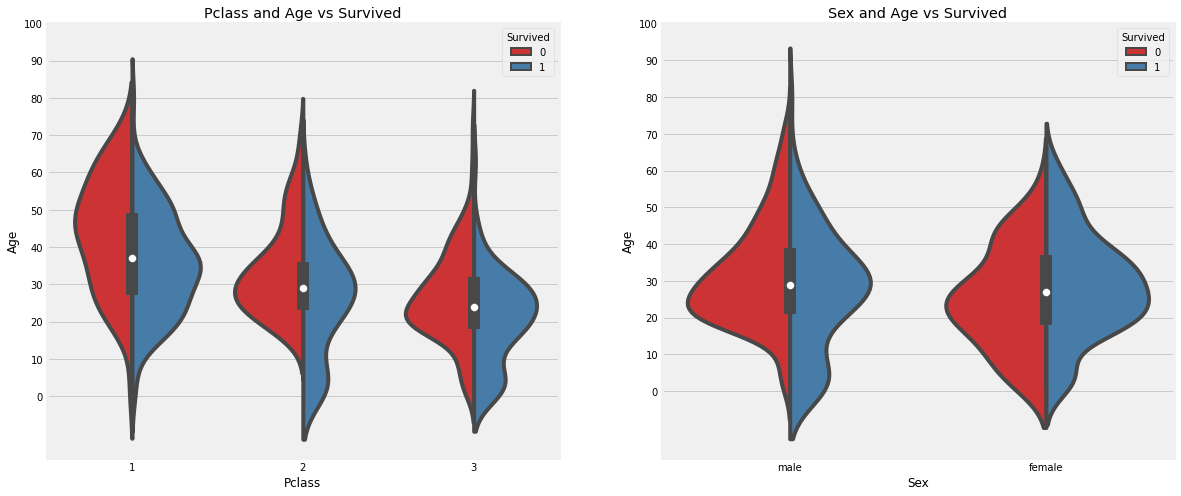

In [78]:
# viollinplot
# 박스 플롯 + 밀집도 그래프
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [79]:
train_df['Initial'] = 0
for i in train_df:
  train_df['Initial'] = train_df.Name.str.extract('([A-Za-z]+)\.')

In [81]:
pd.crosstab(train_df.Initial, train_df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [82]:
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [83]:
train_df.groupby('Initial')['Age'].mean() # lets check the average age by Initial

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [84]:
# Filiing NaN Ages
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df.Initial=='Other'),'Age']=46

In [85]:
train_df.Age.isnull().any() # So no null values left finally

False

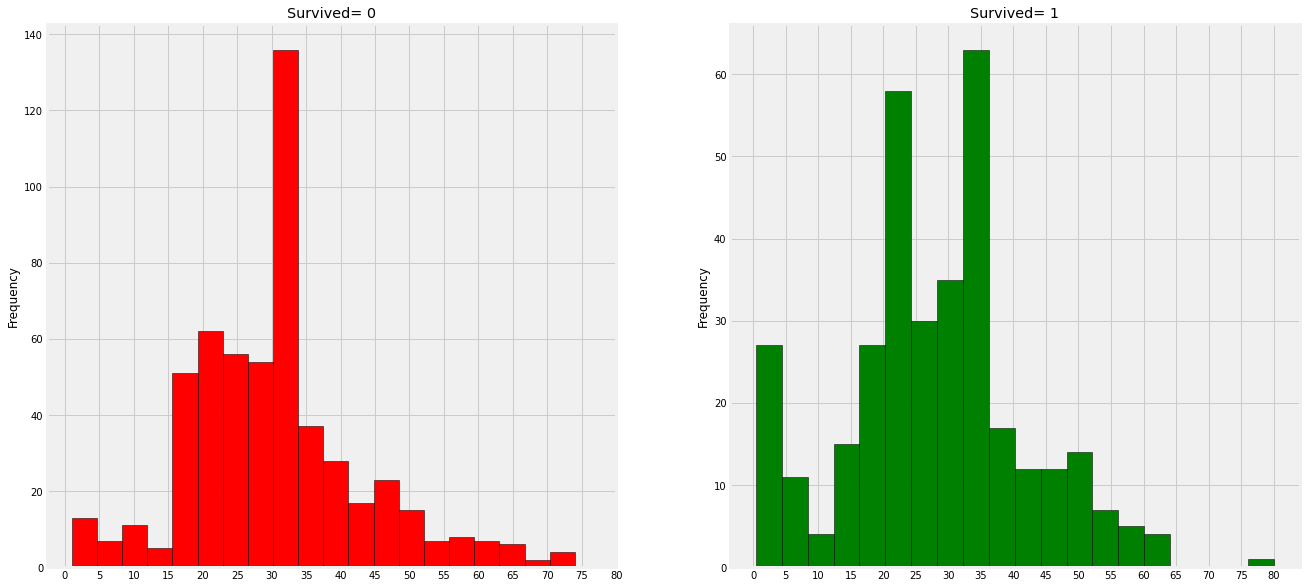

In [87]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train_df[train_df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_df[train_df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

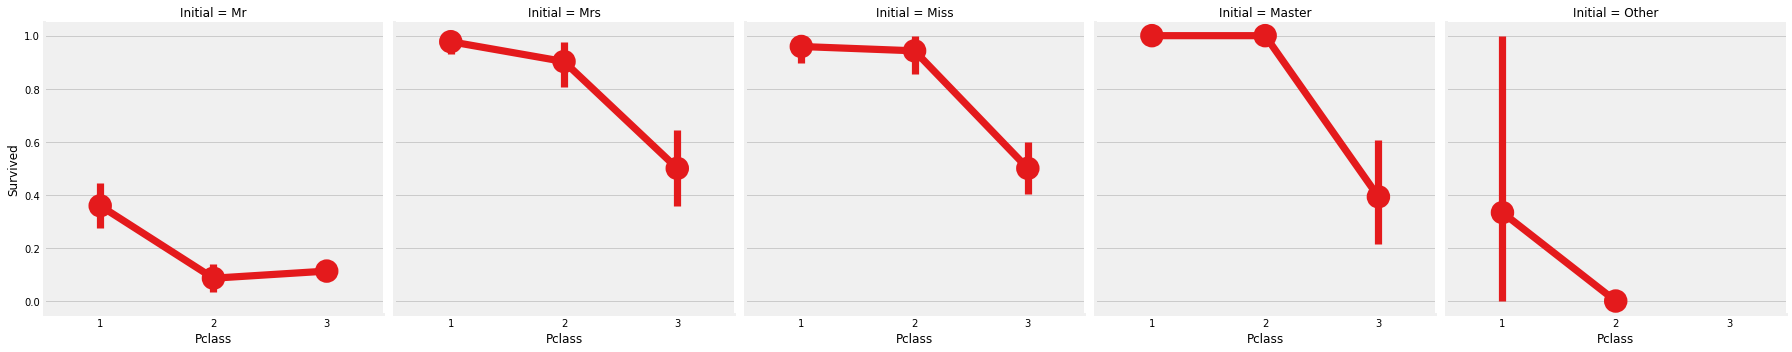

In [89]:
sns.factorplot('Pclass','Survived',col='Initial',data=train_df)
plt.show()

#Embarked -> Categorical Value

In [90]:
pd.crosstab([train_df.Embarked,train_df.Pclass],[train_df.Sex,train_df.Survived],margins=True).style.background_gradient(cmap='summer_r')

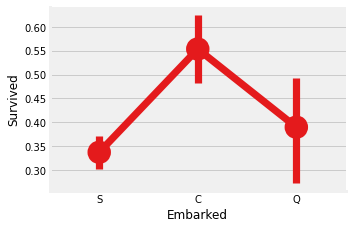

In [91]:
sns.factorplot('Embarked','Survived',data=train_df)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

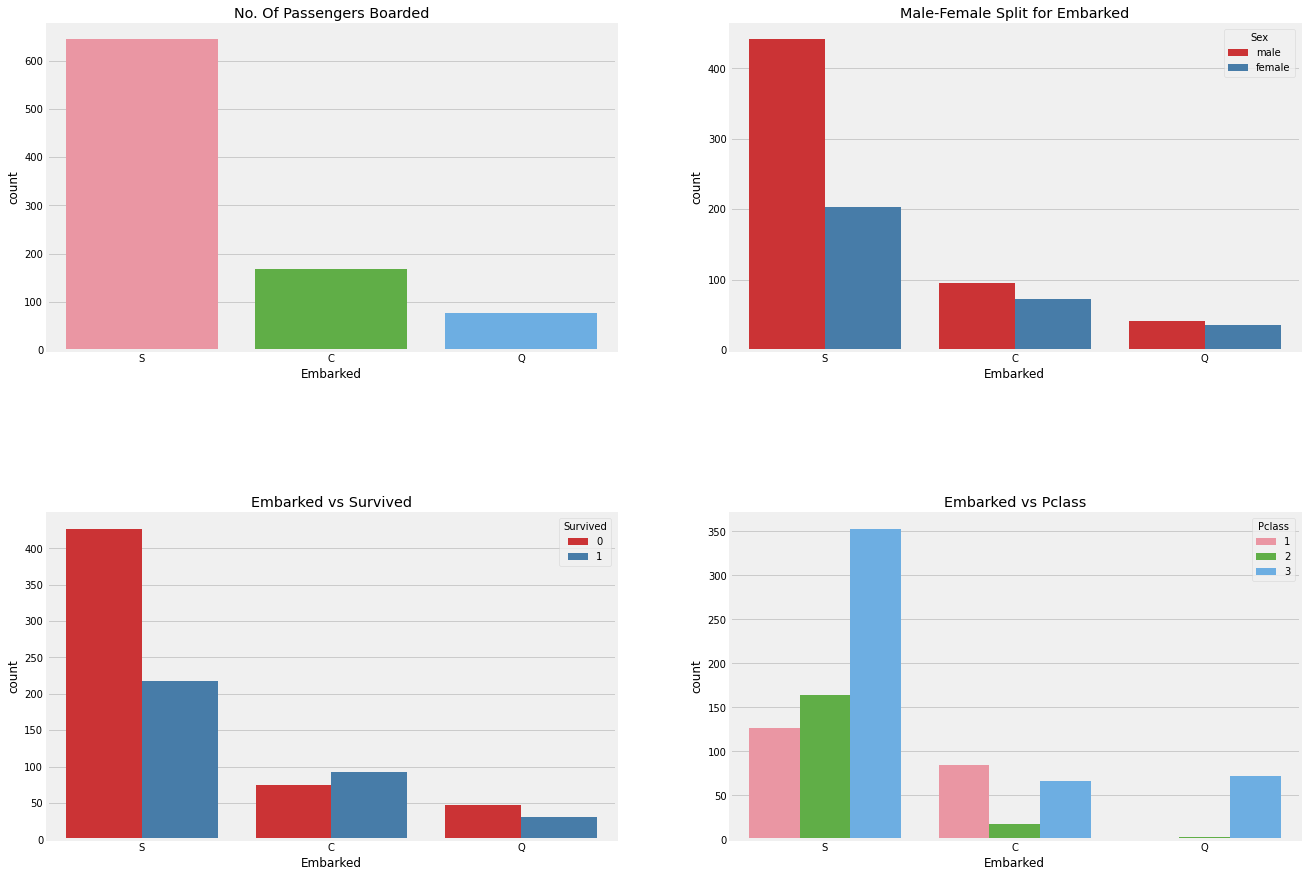

In [92]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train_df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train_df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train_df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train_df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

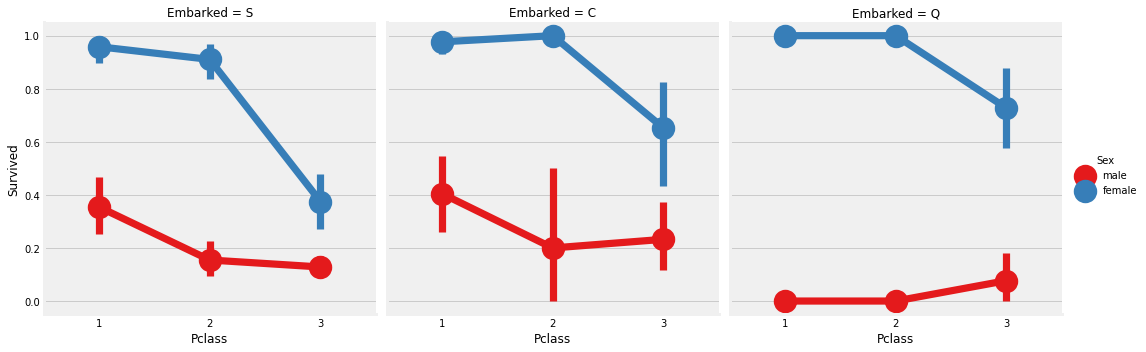

In [93]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_df)
plt.show()

In [95]:
# 포트 S에서 탑승한 최대 승객을 보았으므로 NaN을 S로 바꾼다.
train_df['Embarked'].fillna('S', inplace=True)
train_df.Embarked.isnull().any()

False

#SibSip -> Discrete Feature

In [96]:
# 이 기능은 사람이 혼자인지 가족과 함께 있는지를 나타낸다.
# 형제자매 = 형제, 자매, 이복형제, 이복자매
# 배우자 = 남편, 아내
pd.crosstab([train_df.SibSp],train_df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0
